To predict whether members of the test population would be earning below or above $50,000 based on the variables taken into account in the analysis.

The objective of this challenge is to create a machine learning model to predict whether an individual earns above or below a certain amount.

This solution can potentially reduce the cost and improve the accuracy of monitoring key population indicators such as income level in between census years. This information will help policymakers to better manage and avoid income inequality globally.

This data has been collected from a random population.

There are ~200 000 individuals in train and ~100 000 individuals in the test file.

The train & test data will be used to create a machine learning model to predict if an individual earns above 50 000 of a specific currency.

The key variables are as follows:

Age.
Gender.
Education.
Class.
Education institute.
Marital status.
Race.
Is hispanic.
Employment commitment.
Unemployment reason.
Employment state.
Wage per hour.
Is part of labor union.
Working week per year.
Industry code.
Main Industry code.
Occupation code.
Main Occupation code.
Total employed.
Household stat.
Household summary.
Under 18 family.
Veterans adminquestionnaire.
Veteran benefit.
Tax status.
Gains.
Losses.
Stocks status.
Citizenship.
Migration year.
Country of birth own.
Country of birth father.
Country of birth mother.
Migration code change in msa.
Migration previous sunbelt.
Migration code move within registration.
Migration code change in registration.
Residence 1 year ago.
Old residence registration.
Old residence state.
Importance of record.
Income above limit.
Based on the variables set up and the data target requirements, the analysis can be assumed to be based on 20th century American population data where the median income was about $ 50,000.

<h1>Why Predict Income?</h1>
Income prediction extracts insights from individual and population-level data as it offers the ability to forecast income levels, assess financial risks, target marketing campaigns, and inform crucial decision-making in diverse spheres. However, ethical considerations, potential biases, and data privacy concerns demand careful attention alongside its undeniable benefits.

Applications in Specific Industries:
<h6>Finance:</h6>
Credit scoring and loan approval: Predicting income to assess risk and determine loan eligibility.
Fraud detection: Identifying suspicious financial activity based on income patterns.
Targeted marketing: Tailoring financial products and services to individuals based on predicted income.
Wealth management: Personalized investment strategies based on income potential and risk tolerance.
<h6>Healthcare:</h6>
Predicting healthcare costs and resource allocation based on patient income and demographics.
Identifying individuals at risk of financial hardship due to medical bills.
Developing targeted health insurance plans based on income segments.
Assessing eligibility for government healthcare programs.
<h6>Marketing and Retail:</h6>
Customer segmentation and targeted advertising based on predicted income groups.
Product pricing strategies tailored to different income segments.
Predicting customer lifetime value and optimizing marketing spend.
Identifying potential high-value customers based on income potential.
<h6>Human Resources:</h6>
Salary benchmarking and compensation planning based on industry standards and predicted income trends.
Predicting employee turnover risk based on job satisfaction and income-related factors.
Identifying and attracting top talent by offering competitive compensation packages.
Optimizing talent management strategies based on income potential and skillsets.
<h6>Public Policy:</h6>
Predicting tax revenue and allocating government resources based on income distribution.
Identifying individuals in need of social assistance programs based on income poverty.
Evaluating the effectiveness of government policies aimed at income inequality.
Designing progressive taxation systems based on predicted income levels.
<h6>Challenges and Considerations:</h6>
Data privacy and security concerns related to income information.
Potential for biases and discrimination based on income prediction models.
Explainability and transparency of income prediction algorithms.
The impact of income prediction on individual behavior and choices.

In [89]:
import pandas as pd
import numpy as np

In [113]:
raw_data=pd.read_csv('D:\KAGGLE DS\incomeprediction 20th century\Income Prediction\Train.csv',skipinitialspace=True)
raw_data

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit


<h2>To know about the variables</h3>

In [114]:
description=pd.read_csv('D:\KAGGLE DS\incomeprediction 20th century\Income Prediction\VariableDefinitions.csv')
description

,Column,Description
0,age,Age Of Individual
1,gender,Gender
2,education,Education
3,class,Class Of Worker
4,education_institute,Enrolled Educational Institution in last week
5,marital_status,Marital_Status
6,race,Race
7,is_hispanic,Hispanic Origin
8,employment_commitment,Full Or Part Time Employment Stat
9,unemployment_reason,Reason For Unemployment


In [115]:
data=raw_data.copy()
data.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,15.332398,11.321734,1.956067,1.515854,435.926887,36.881737,194.533420,94.499745,1740.888324
std,22.306738,0.555562,276.757327,24.397963,18.049655,14.460839,2.365154,0.850853,4696.359500,270.383302,1956.375501,0.500001,995.559557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,37.870000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1061.290000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1617.040000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2185.480000
max,90.000000,2.000000,9999.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,18656.300000


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     208617 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

We can assume that if they're younger than 18 and arent classed in any professional class then they've never been employed
and if they're older than 65 and professionally unclass then there is a high probability they're retired.

Function to update employment status and related fields based on age and NaN values

In [117]:
def update_employment_related(df):
    df.loc[(df["age"] <= 18) & pd.isna(df["class"]), ["class", "occupation_code", "occupation_code_main"]] = ["Never worked", 0, "None"]
    df.loc[(df["age"] >= 65) & pd.isna(df["class"]), ["class", "occupation_code", "occupation_code_main"]] = ["Retired", 0, "None"]
    return df
train_df = update_employment_related(data.copy())
train_df

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Retired,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Retired,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,Never worked,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Retired,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,Never worked,High school,Never married,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),Retired,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,Never worked,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit


 We can assume that the remaining people between 18-64 are just unemployed (there are outliers but we can assume they are few)
Function to update employment status and related fields based on unknown 'class' variable.

In [118]:
def update_employment_related(df):
    df.loc[(df["occupation_code"] == 0) & pd.isna(df["class"]), ["class", "occupation_code", "occupation_code_main"]] = ["Unemployed", 0, "None"]
    return df

# Apply the function to the DataFrame
train_df = update_employment_related(train_df.copy())  # Use a copy to avoid modifying the original
train_df[train_df["class"].isnull()].head(5)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit


<h1>Variables with missing values.</h1>

                                Missing values  Ratio
veterans_admin_questionnaire            207415  99.01
unemployment_reason                     202979  96.89
education_institute                     196197  93.65
old_residence_reg                       193148  92.20
old_residence_state                     193148  92.20
is_labor_union                          189420  90.42
under_18_family                         151654  72.39
residence_1_year_ago                    106284  50.73
migration_prev_sunbelt                   88452  42.22
migration_code_change_in_msa              1588   0.76
migration_code_move_within_reg            1588   0.76
migration_code_change_in_reg              1588   0.76
is_hispanic                                882   0.42
occupation_code_main                       449   0.21
****************************************************************************************************


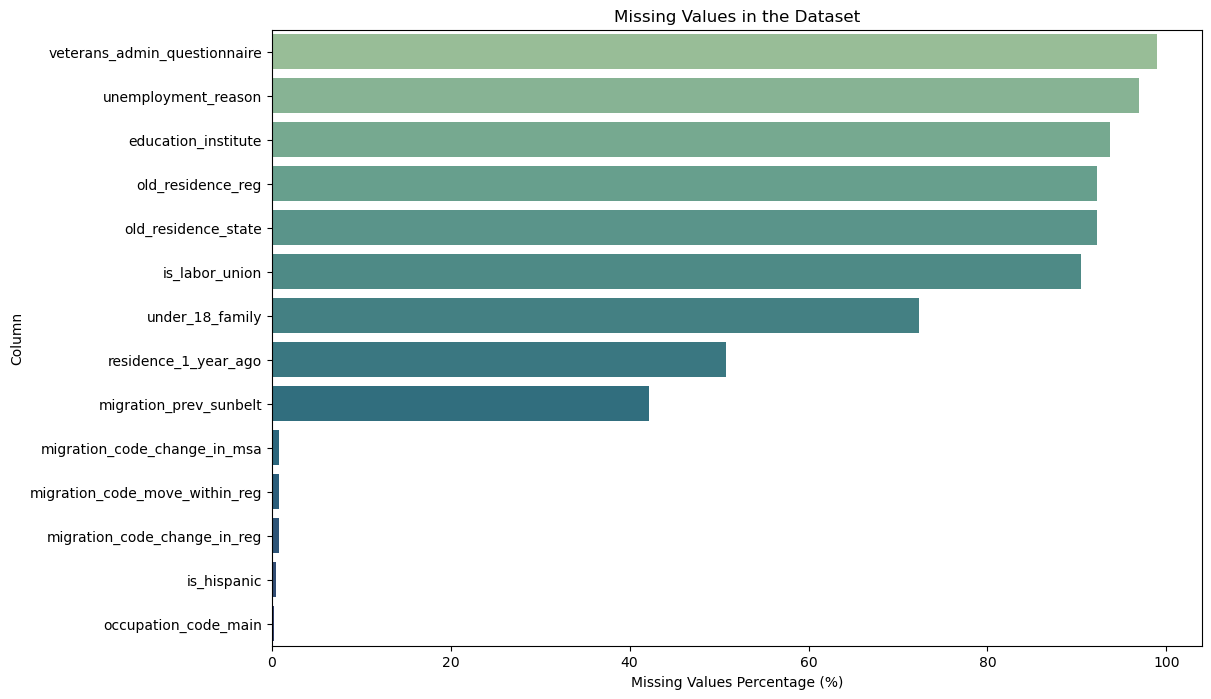

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
def missing_values(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum()>0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_,2)], axis=1,keys=["Missing values", "Ratio"])
    missing_df= pd.DataFrame(missing_df)
    print(missing_df)
    print('*'*100)

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x="Ratio", y=missing_df.index, data=missing_df, palette="crest")
    ax.set(xlabel="Missing Values Percentage (%)", ylabel="Column", 
        title=f"Missing Values in the Dataset")
    plt.show()

missing_values(train_df)

In [120]:
from sklearn.impute import SimpleImputer
def impute_based_on_others(df):
    for col in df.columns:
        if df[col].dtype == "object":
            # For categorical variables:
            most_probable_values = df[col].dropna().mode().iloc[0]
            df[col].fillna(most_probable_values, inplace=True) 
        else:
            # For numerical variables:
            imputer = SimpleImputer(strategy="mean")
            df[col] = imputer.fit_transform(df[[col]])
    return df
train_df = impute_based_on_others(data.copy())  
train_df

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79.0,Female,High school graduate,Private,High school,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,Same,South,California,1779.74,Below limit
1,ID_TZ0001,65.0,Female,High school graduate,Private,High school,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,?,unchanged,unchanged,Same,South,California,2366.75,Below limit
2,ID_TZ0002,21.0,Male,12th grade no diploma,Federal government,High school,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,?,unchanged,unchanged,Same,South,California,1693.42,Below limit
3,ID_TZ0003,2.0,Female,Children,Private,High school,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,?,unchanged,unchanged,Same,South,California,1380.27,Below limit
4,ID_TZ0004,70.0,Male,High school graduate,Private,High school,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,Same,South,California,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16.0,Female,7th and 8th grade,Private,High school,Never married,White,All other,Not in labor force,...,US,?,?,?,?,Same,South,California,2170.60,Below limit
209495,ID_TZ99996,78.0,Male,Bachelors degree(BA AB BS),Private,High school,Married-civilian spouse present,White,All other,Not in labor force,...,Canada,?,?,?,?,Same,South,California,1029.57,Below limit
209496,ID_TZ99997,8.0,Female,Children,Private,High school,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,Same,South,California,791.61,Below limit
209497,ID_TZ99998,26.0,Female,Some college but no degree,Private,High school,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,?,unchanged,unchanged,Same,South,California,3530.26,Below limit


<h2>Featur encoding </h2>

In [121]:
gender_mapping = {
    "Male": 0,
    "Female": 1
}
train_df['gender'] = train_df['gender'].map(gender_mapping)
train_df['gender']

0         1
1         1
2         0
3         1
4         0
         ..
209494    1
209495    0
209496    1
209497    1
209498    0
Name: gender, Length: 209499, dtype: int64

In [122]:
income_mapping = {
    "Below limit": 0,
    "Above limit": 1
}

train_df['income_above_limit'] = train_df['income_above_limit'].map(income_mapping)

In [123]:
education_values = data['education'].unique()
education_values

array(['High school graduate', '12th grade no diploma', 'Children',
       'Bachelors degree(BA AB BS)', '7th and 8th grade', '11th grade',
       '9th grade', 'Masters degree(MA MS MEng MEd MSW MBA)',
       '10th grade', 'Associates degree-academic program',
       '1st 2nd 3rd or 4th grade', 'Some college but no degree',
       'Less than 1st grade', 'Associates degree-occup /vocational',
       'Prof school degree (MD DDS DVM LLB JD)', '5th or 6th grade',
       'Doctorate degree(PhD EdD)'], dtype=object)

In [124]:
education_mapping = {"Children": "Below high school",
                    "1st 2nd 3rd or 4th grade": "Below high school",
                    "5th or 6th grade": "Below high school",
                    "7th and 8th grade": "Below high school",
                    "9th grade": "Below high school",
                    "10th grade": "Below high school",
                    "11th grade": "Below high school",
                    "12th grade no diploma": "Below high school",
                    "High school graduate": "High school",
                    "Some college but no degree": "Undergraduate",
                    "Associates degree-academic program": "Undergraduate",
                    "Associates degree-occup /vocational": "Undergraduate",
                    "Bachelors degree(BA AB BS)": "Undergraduate",
                    "Masters degree(MA MS MEng MEd MSW MBA)": "Postgraduate",
                    "Prof school degree (MD DDS DVM LLB JD)": "Postgraduate",
                    "Doctorate degree(PhD EdD)": "Postgraduate",
}
train_df['education'] = train_df['education'].map(education_mapping)
train_df

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79.0,1,High school,Private,High school,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,Same,South,California,1779.74,0
1,ID_TZ0001,65.0,1,High school,Private,High school,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,?,unchanged,unchanged,Same,South,California,2366.75,0
2,ID_TZ0002,21.0,0,Below high school,Federal government,High school,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,?,unchanged,unchanged,Same,South,California,1693.42,0
3,ID_TZ0003,2.0,1,Below high school,Private,High school,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,?,unchanged,unchanged,Same,South,California,1380.27,0
4,ID_TZ0004,70.0,0,High school,Private,High school,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,Same,South,California,1580.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16.0,1,Below high school,Private,High school,Never married,White,All other,Not in labor force,...,US,?,?,?,?,Same,South,California,2170.60,0
209495,ID_TZ99996,78.0,0,Undergraduate,Private,High school,Married-civilian spouse present,White,All other,Not in labor force,...,Canada,?,?,?,?,Same,South,California,1029.57,0
209496,ID_TZ99997,8.0,1,Below high school,Private,High school,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,Same,South,California,791.61,0
209497,ID_TZ99998,26.0,1,Undergraduate,Private,High school,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,?,unchanged,unchanged,Same,South,California,3530.26,0


In [125]:
marriage_status_values =data['marital_status'].unique()
marriage_status_values

array(['Widowed', 'Never married', 'Married-civilian spouse present',
       'Divorced', 'Married-spouse absent', 'Separated',
       'Married-A F spouse present'], dtype=object)

In [126]:
marriage_mapping = {"Married-civilian spouse present": "Married",
                    "Married-spouse absent": "Married",
                    "Married-A F spouse present": "Married",
                    "Widowed": "Single", "Divorced": "Single",
                    "Separated": "Single", "Never married": "Single",
}
train_df['marital_status'] = train_df['marital_status'].map(marriage_mapping)
train_df["marital_status"] = train_df["marital_status"].map({"Married": 0, "Single": 1})


In [127]:
citizenship_values = data['citizenship'].unique()
citizenship_values

array(['Native', 'Foreign born- Not a citizen of U S ',
       'Foreign born- U S citizen by naturalization',
       'Native- Born abroad of American Parent(s)',
       'Native- Born in Puerto Rico or U S Outlying'], dtype=object)

In [128]:
citizenship_mapping = {"Native": "Citizen",
                    "Native- Born abroad of American Parent(s)": "Citizen",
                    "Native- Born in Puerto Rico or U S Outlying": "Citizen",
                    "Foreign born- U S citizen by naturalization": "Citizen",
                    "Foreign born- Not a citizen of U S": "Non-citizen"
}
train_df['citizenship'] = train_df['citizenship'].map(citizenship_mapping)
train_df["citizenship"] = train_df["citizenship"].map({"Citizen": 0, "Non-citizen": 1})


In [129]:
train_df

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79.0,1,High school,Private,High school,1,White,All other,Not in labor force,...,US,?,?,?,?,Same,South,California,1779.74,0
1,ID_TZ0001,65.0,1,High school,Private,High school,1,White,All other,Children or Armed Forces,...,US,unchanged,?,unchanged,unchanged,Same,South,California,2366.75,0
2,ID_TZ0002,21.0,0,Below high school,Federal government,High school,1,Black,All other,Children or Armed Forces,...,US,unchanged,?,unchanged,unchanged,Same,South,California,1693.42,0
3,ID_TZ0003,2.0,1,Below high school,Private,High school,1,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,?,unchanged,unchanged,Same,South,California,1380.27,0
4,ID_TZ0004,70.0,0,High school,Private,High school,0,White,All other,Not in labor force,...,US,?,?,?,?,Same,South,California,1580.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16.0,1,Below high school,Private,High school,1,White,All other,Not in labor force,...,US,?,?,?,?,Same,South,California,2170.60,0
209495,ID_TZ99996,78.0,0,Undergraduate,Private,High school,0,White,All other,Not in labor force,...,Canada,?,?,?,?,Same,South,California,1029.57,0
209496,ID_TZ99997,8.0,1,Below high school,Private,High school,1,White,All other,Children or Armed Forces,...,US,?,?,?,?,Same,South,California,791.61,0
209497,ID_TZ99998,26.0,1,Undergraduate,Private,High school,0,White,All other,Children or Armed Forces,...,US,unchanged,?,unchanged,unchanged,Same,South,California,3530.26,0
